In [680]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [681]:
#age. The age of the patient.
#sex. The gender of the patient. (1 = male, 0 = female).
#cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
#trestbps. Resting blood pressure in mmHg.
#chol. Serum Cholestero in mg/dl.
#fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
#restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
#thalach. Max heart rate achieved.
#exang. Exercise induced angina (1 = yes, 0 = no).
#oldpeak. ST depression induced by exercise relative to rest.
#slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
#ca. Number of major vessels (0–3) colored by flourosopy.
#thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
#num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope",
               "ca", "thal", "num"]

test_set = pd.read_csv("processed.cleveland.test.data", delimiter=",")
train_set = pd.read_csv("processed.cleveland.train.data", delimiter=",")
train_set.columns = column_names

test_set.columns = (column_names[:-1])

x_test = test_set

x_train = train_set
y_train = train_set['num']
x_train = train_set.drop(columns=['num'])

print(len(train_set))
train_set

153


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0
1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
2,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
3,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
4,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
149,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
150,48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0,0
151,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0,3


In [682]:
# ### ETT FÖRSÖK TILL CV
# from sklearn import svm
# from sklearn.model_selection import cross_val_score
# from sklearn import tree
# from sklearn.ensemble import RandomForestClassifier

# #svc = svm.SVC(kernel='linear', random_state=42)
# clf_dec_tree = tree.DecisionTreeClassifier()

# dec_tree_score = cross_val_score(clf_dec_tree, x_train, y_train, cv=10)

# print("Decision tree: " + str(dec_tree_score.mean()))



In [683]:
### cel för att ersätta tomma eller felaktiga värden med ett medelvärde 
#x_train.apply(lambda x: x.fillna(x.mean()),axis=0)
#x_train.fillna((x_train['income'].mean()), inplace=True)
#x_test.fillna((sub2['income'].mean()), inplaceTrue)
#x_train = x_train.dropna()

#[f(x) if condition else g(x) for x in sequence]

for col in x_train.columns:
    x_train[col] = [float(x) if x is not '?' else np.NaN for x in x_train[col]]
x_train.fillna((x_train.mean()), inplace=True)
    
#x_train.apply(lambda x: x.fillna(x.mean()),axis=0)

for col in x_test.columns:
    x_test[col] = [float(x) if x is not '?' else np.NaN for x in x_test[col]]
    
x_test.fillna((x_test.mean()), inplace=True)
    
    
#x_test.apply(lambda x: x.fillna(x.mean()),axis=0)

print(x_train['ca'][9])
#for x in x_train[i].dtype)

0.0


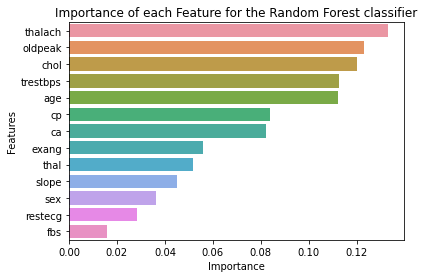

In [684]:
### cell för att kolla vilken data som är viktigast
import seaborn as sns
import matplotlib.pyplot as plt
clf_before_dropping = RandomForestClassifier(random_state=42).fit(x_train, y_train)


feature_scores = pd.Series(clf_before_dropping.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


sns.barplot(x=feature_scores, y=feature_scores.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Vi kan se att fbs och restegc inte är särskilt viktiga 
### vi droppar dem :)

#x_train = x_train.drop(['fbs'], axis=1)
#x_test = x_test.drop(['fbs'], axis=1)

#x_train = x_train.drop(['restecg'], axis=1)
#x_test = x_test.drop(['restecg'], axis=1)



In [702]:
### cell för att normalisera datan! 
from sklearn import preprocessing


#x_train = preprocessing.normalize(x_train, norm='l2')
#x_test = preprocessing.normalize(x_test, norm='l1')
#y_train = preprocessing.normalize(x_train, norm='l2', axis=0)
#y_train = [x.mean() for x in y_train]

### inte manipulera med testdatan, AJABAJA det kan bli biased. 

#x_test = preprocessing.normalize(x_test, norm='l2')

#d = preprocessing.normalize(x_train, axis=0)
#x_train = pd.DataFrame(d, columns=column_names[:-1])
#x_train.head()


for col in x_train.columns :
    mean = x_train[col].mean()
    x_train[col] = x_train[col] - mean 
    x_test[col] = x_test[col] - mean
    sigma = 1/(len(x_train[col])) * sum(x_train[col]**2)
    x_train[col] = x_train[col] / sigma
    x_test[col] = x_test[col] / sigma


print(x_train)

           age       sex        cp   trestbps       chol       fbs   restecg  \
0     3.986928 -0.666667  0.843137  -1.019608  -47.69281 -0.143791 -1.078431   
1     2.986928 -0.666667  0.843137 -11.019608  109.30719 -0.143791 -1.078431   
2    -1.013072  0.333333  0.843137  10.980392  -18.69281 -0.143791  0.921569   
3    -3.013072 -0.666667  0.843137  -1.019608   60.30719 -0.143791 -1.078431   
4    -0.013072  0.333333 -1.156863  60.980392   38.30719 -0.143791  0.921569   
..         ...       ...       ...        ...        ...       ...       ...   
148   3.986928  0.333333 -1.156863 -11.019608   39.30719 -0.143791  0.921569   
149 -19.013072 -0.666667  0.843137   6.980392  -61.69281 -0.143791 -1.078431   
150  -6.013072  0.333333 -0.156863  -7.019608   10.30719  0.856209 -1.078431   
151  -6.013072  0.333333  0.843137  -7.019608   29.30719 -0.143791  0.921569   
152   2.986928  0.333333  0.843137  18.980392   31.30719 -0.143791  0.921569   

       thalach     exang  oldpeak     s

In [725]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
### Hämtar predictions!

#clf = RandomForestClassifier(random_state=42, max_features=13,
#                             n_estimators=200, min_samples_leaf=50, n_jobs=-1)

################################# TESTAR BAGGING #########################
clf = BaggingRegressor(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=42).fit(x_train, y_train)
##########################################################################


random_forest_score = cross_val_score(clf, x_train, y_train, cv=9)

print("Random forest: " + str(random_forest_score.mean()))
print("")
#y_pred_proba = clf.predict_proba(x_test)


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 



#print((y_pred))
y_predictions = []
for i in range(len(y_pred_proba)):
    
    y_predictions.append( [y_pred_proba[i][0], sum(y_pred_proba[i][1:])])
    #y_predictions.append(sum(y_pred_proba[i][1:]))
    
#print(y_predictions)
## om gissning är över 0.75 då är det en tillräckligt bra estimation. 

final_predictions = []
for pred in y_predictions:
    final_predictions.append((pred[1]))

print(final_predictions)
#print(len(final_predictions))

Random forest: 0.12360769643184259

[0.7899999999999999, 0.45, 0.5700000000000001, 0.36, 0.30000000000000004, 0.75, 0.02, 0.7300000000000001, 0.51, 0.45999999999999996, 0.7600000000000001, 0.37000000000000005, 0.47000000000000003, 0.19999999999999998, 0.23, 0.15000000000000002, 0.46, 0.73, 0.74, 0.9400000000000001, 0.85, 0.9600000000000001, 0.35, 0.5, 0.6799999999999999, 0.8200000000000001, 0.04, 0.8999999999999999, 1.0, 0.06, 0.30000000000000004, 0.02, 0.16999999999999998, 0.27, 0.35000000000000003, 0.03, 0.68, 0.89, 0.21, 0.43, 0.96, 0.8900000000000001, 0.98, 0.44, 0.96, 0.9500000000000001, 0.07, 0.44000000000000006, 0.96, 0.8599999999999999, 0.6699999999999999, 0.39, 0.05, 0.9400000000000002, 0.36, 0.15, 0.98, 0.72, 0.25, 0.13, 0.54, 0.25, 0.28, 0.060000000000000005, 0.35, 0.18000000000000002, 0.5700000000000001, 0.91, 0.9, 0.9599999999999999, 0.33000000000000007, 0.75, 0.4, 0.03, 0.8700000000000001, 0.51, 0.32000000000000006, 0.25, 0.38, 0.8800000000000001, 0.5900000000000001, 0.83

In [719]:
### CELL FÖR CROSS-VALIDATION 

random_forest = RandomForestClassifier(max_features=13, n_estimators=200,
                                       min_samples_leaf=50, n_jobs=-1)



Random forest: 0.5228758169934641


In [688]:
### cell för att kolla hur bra vår fit är 





In [689]:
import csv

index = np.arange(0,150,1)

#print(index)

with open("nutestarvi.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['id','expected'])
    for i in range(len(final_predictions)):
        
        wr.writerow([i, final_predictions[i]])
    
        
    
    
test1 = pd.read_csv("nutestarvi.csv", delimiter=",")
test1

,id,expected
0,0,0.79
1,1,0.45
2,2,0.57
3,3,0.36
4,4,0.30
...,...,...
145,145,0.43
146,146,0.93
147,147,0.52
148,148,0.36
